## Collecting Corona Virus Proteins from Uniprot Database

**What is Uniprot Database?**

UniProt is a freely accessible database of protein sequence and functional information, many entries being derived from genome sequencing projects. It contains a large amount of information about the biological function of proteins derived from the research literature.[source: Wikipedia](https://en.wikipedia.org/wiki/UniProt)

**Why is this protein list important to current COVID-19 Dataset?**

Inorder to gather the information about the biomolecular mechanism from the scientific literature (COVID-19 Dataset), one need to have the list of associated Proteins, Genes, Pathways, Drugs etc. This notebook presents the steps to gather Corona Virus associated proteins, Gene names and associated Pathways from Uniprot database. These lits could be useful to look at the textual documents for further NLP processing and to present the entity relationship.

#### Step -I
Gp to Uniprot Database (https://www.uniprot.org/) and select UniprotKB in search bar. Then inter corona virus into the search bar.


![](https://github.com/Vasuji/COVID19/blob/master/img/uniprot-search.png?raw=true)

#### Step -II:
After you hit search operation, you will get a table like disply of the result. It is multi page table. 

![](https://github.com/Vasuji/COVID19/blob/master/img/uniprot-table.png?raw=true)

#### Step-III:
Look at the right most task bar of this table. You can see pen like icon through which you get next window. You can make a selection of the information you want to gather (e.g., Name, Gene, Pathways).

![](https://github.com/Vasuji/COVID19/blob/master/img/pen.png?raw=true)

#### Step - IV

Once you are done with selection of information, you can go back to previous table and hit download button. You can select the format of the data. Excel file download is one option.

![](https://github.com/Vasuji/COVID19/blob/master/img/uniprot-download.png?raw=true)


#### What After getting Protein Data?

Lets play around with this data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_path = "data/corona.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,Entry,Entry name,Status,Protein names,Gene names,Organism,Virus hosts,Pathway
0,A0A3R5SMJ6,A0A3R5SMJ6_WNV,unreviewed,Genome polyprotein,NaN,West Nile virus (WNV),Aedes [TaxID: 7158]; Amblyomma variegatum (Tro...,NaN
1,M1UFP6,M1UFP6_9FLAV,unreviewed,Genome polyprotein,NaN,Bovine viral diarrhea virus 1b,NaN,NaN
2,P11223,SPIKE_IBVB,reviewed,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 2,Avian infectious bronchitis virus (strain Beau...,Gallus gallus (Chicken) [TaxID: 9031],NaN
3,P11224,SPIKE_CVMA5,reviewed,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 3,Murine coronavirus (strain A59) (MHV-A59) (Mur...,Mus musculus (Mouse) [TaxID: 10090],NaN
4,P0C6X9,R1AB_CVMA5,reviewed,Replicase polyprotein 1ab (pp1ab) (ORF1ab poly...,rep 1a-1b,Murine coronavirus (strain A59) (MHV-A59) (Mur...,Mus musculus (Mouse) [TaxID: 10090],NaN


**There are total 21,876 proteins from different sources**

In [4]:
df.shape

(21876, 8)

### Q: What are the different Organisms? Can you find the top 50 Organisms?

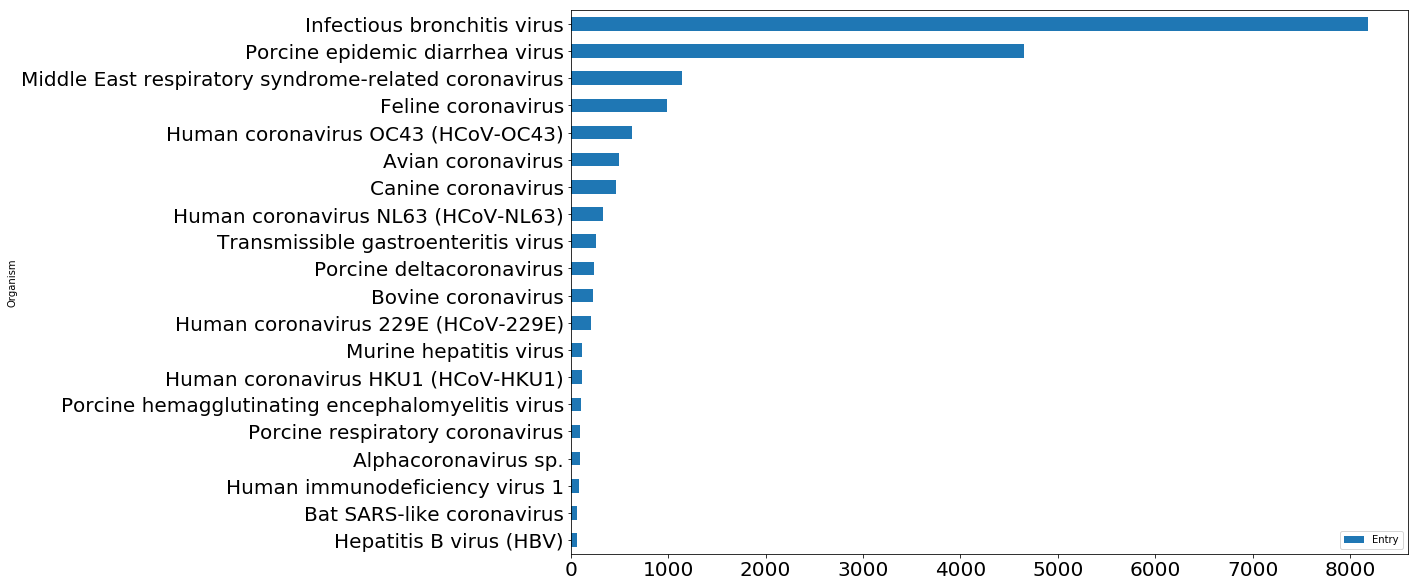

In [5]:
df_organism = pd.DataFrame(df.groupby("Organism").count()['Entry'])
df_organism = df_organism.sort_values(by = "Entry", ascending = False)
df_organism[0:20].plot.barh(figsize = [15,10], fontsize =20)
plt.gca().invert_yaxis()

In [6]:
df_organism[0:20]

,Entry
Organism,
Infectious bronchitis virus,8184
Porcine epidemic diarrhea virus,4657
Middle East respiratory syndrome-related coronavirus,1139
Feline coronavirus,983
Human coronavirus OC43 (HCoV-OC43),630
Avian coronavirus,497
Canine coronavirus,463
Human coronavirus NL63 (HCoV-NL63),333
Transmissible gastroenteritis virus,258


### Q: What are the different Viral hosts? Can you find top Virus hosts?

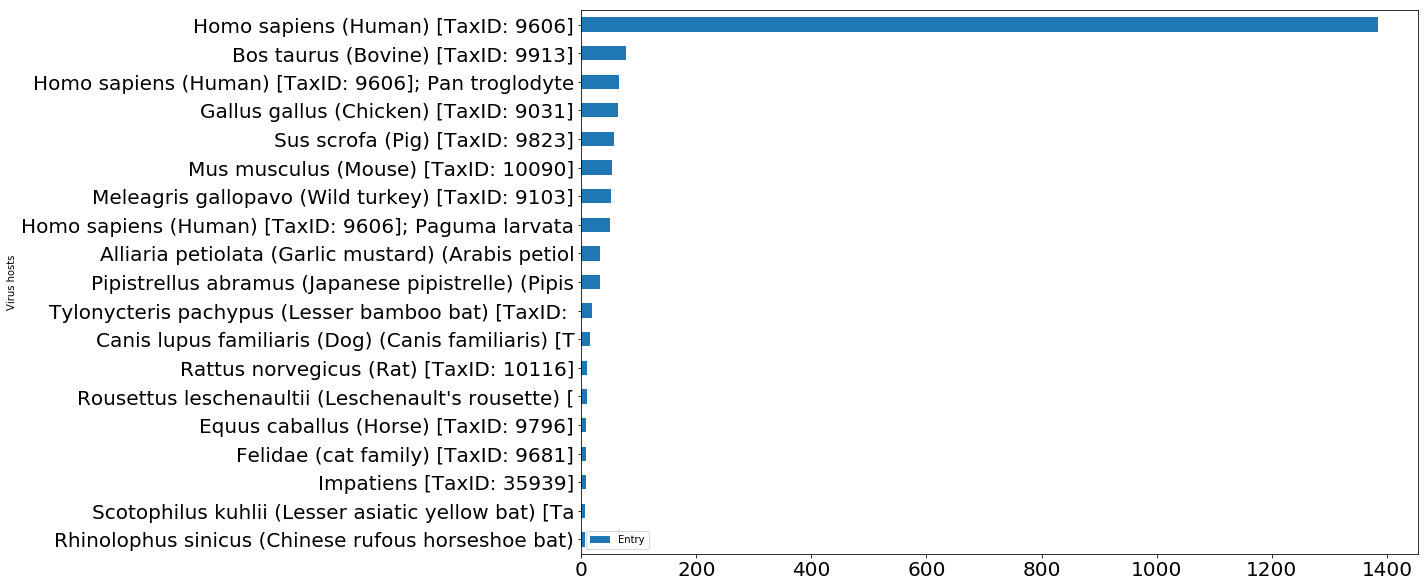

In [7]:
df['Virus hosts'] = df['Virus hosts'].apply(lambda x: str(x)[0:50] )
df_host = pd.DataFrame(df.groupby("Virus hosts").count()['Entry'])
df_host = df_host.sort_values(by = "Entry", ascending = False)
df_host[1:20].plot.barh(figsize = [15,10], fontsize =20)
plt.gca().invert_yaxis()

#### Cleaning Protein Names, Synonyms and abbreviations

In [8]:
def filter(line):
    proteins = set()
    line = str(line)
    line = line.lower()
    
    '''for lines without () or [] terms'''
    if "(" not in line or "[" not in line:
        proteins.add(line.strip().replace(' ', '_'))
        
        
    '''for line including () terms'''    
    if '(' in line:
        start = 0
        open_in = line.find('(')
        tmp = line[start:open_in].strip().replace(' ', '_')
        proteins.add(tmp)
        while open_in >=0:
            start = open_in+1
            end = line.find(')', start)
            proteins.add(line[start:end].strip().replace(' ', '_'))
            open_in = line.find('(', end)
     
    '''for lines including [] trems'''
    if '[' in line:
        raw = line[line.find('['):line.find(']')]
        #print("THIS IS RAW:", raw[15:-1])
        raw = raw[15:-1]
        lraw = raw.split("; ")
        for item in lraw:
            #print(item)
            if '(' in item:
                start = 0
                open_in = item.find('(')
                tmp = item[start:open_in].strip().replace(' ', '_')
                proteins.add(tmp)
            else:
                proteins.add(item.strip().replace(' ', '_'))
    return proteins

In [9]:
allProteins = []
i = 0
for u,p in zip(df['Entry'],df['Protein names']):
    print(u,"|",p)
    print("------------")
    print(u,"|",filter(p))
    print("===================================================")
    i += 1
    if i>4:
        break

A0A3R5SMJ6 | Genome polyprotein
------------
A0A3R5SMJ6 | {'genome_polyprotein'}
M1UFP6 | Genome polyprotein
------------
M1UFP6 | {'genome_polyprotein'}
P11223 | Spike glycoprotein (S glycoprotein) (E2) (Peplomer protein) [Cleaved into: Spike protein S1; Spike protein S2; Spike protein S2']
------------
P11223 | {'peplomer_protein', 'e2', 'spike_glycoprotein', 'spike_protein_s1', 's_glycoprotein', 'spike_protein_s2'}
P11224 | Spike glycoprotein (S glycoprotein) (E2) (Peplomer protein) [Cleaved into: Spike protein S1; Spike protein S2; Spike protein S2']
------------
P11224 | {'peplomer_protein', 'e2', 'spike_glycoprotein', 'spike_protein_s1', 's_glycoprotein', 'spike_protein_s2'}
P0C6X9 | Replicase polyprotein 1ab (pp1ab) (ORF1ab polyprotein) [Cleaved into: Host translation inhibitor nsp1 (nsp1) (p28); Non-structural protein 2 (nsp2) (p65); Papain-like proteinase (PL-PRO) (EC 3.4.19.12) (EC 3.4.22.69) (Non-structural protein 3) (nsp3) (p210); Non-structural protein 4 (nsp4) (Peptide H

In [10]:
allProteins = []
for u,p in zip(df['Entry'],df['Protein names']):
    allProteins.append({"id":u, "names":list(filter(p))})

In [11]:
allProteins[0:5]

[{'id': 'A0A3R5SMJ6', 'names': ['genome_polyprotein']},
 {'id': 'M1UFP6', 'names': ['genome_polyprotein']},
 {'id': 'P11223',
  'names': ['peplomer_protein',
   'e2',
   'spike_glycoprotein',
   'spike_protein_s1',
   's_glycoprotein',
   'spike_protein_s2']},
 {'id': 'P11224',
  'names': ['peplomer_protein',
   'e2',
   'spike_glycoprotein',
   'spike_protein_s1',
   's_glycoprotein',
   'spike_protein_s2']},
 {'id': 'P0C6X9',
  'names': ["2'-o-methyltransferase",
   'ec_3.4.19.12',
   'peptide_hd2',
   'p12',
   'p10',
   'non-structural_protein_9',
   'nsp10',
   'nsp4',
   'non-structural_protein_6',
   'nsp12',
   'nsp3',
   'nsp5',
   'ec_2.7.7.48',
   'p67',
   'replicase_polyprotein_1ab',
   'non-structural_protein_2',
   'uridylate-specific_endoribonuclease',
   'papain-like_proteinase',
   'rna-directed_rna_polymerase',
   'non-structural_protein_8',
   'non-structural_protein_7',
   'growth_factor-like_peptide',
   'pp1ab',
   'exon',
   'non-structural_protein_10',
   'non-

In [12]:
import json
with open("data/virus-proteins.json", 'w') as fn:
    json.dump(allProteins,fn)

***Note: Bringing more detail about how to create data indexing and search of Proteins, Genes etc from COVID19 dataset in the next notebook***